In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
songs_csv = "../../Resources/merged_songs_data.csv"
songs_df = pd.read_csv(songs_csv, index_col=0)
# songs_df.columns
songs_df = songs_df.dropna()
songs_df = songs_df.sort_values(by=['popularity'])
songs_df.head()

G:\Programs\Anaconda\envs\PythonAdv\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
1316,7u1LLhNqecfHzu6O0SD8Vw,0.285,0.966,11,1.369,1,0.0632,0.65100,0.879000,0.1710,0.4660,86.453,124560,4.0,0.0
1210,1OR29CDoZkgNgYbPHMuBTD,0.422,0.947,10,-6.879,1,0.5080,0.17000,0.000000,0.7750,0.2360,117.340,40120,4.0,0.0
1211,0prv1JqFF75iNvjr9ihOho,0.294,0.837,0,-5.306,1,0.0482,0.00219,0.000000,0.8820,0.6400,134.755,180573,4.0,0.0
1212,3ejBDmup7fFu3mMrJLpNNL,0.149,0.340,11,-8.613,0,0.0757,0.38000,0.000146,0.8910,0.0833,212.155,127853,3.0,0.0
1250,17RotlN2CUYC1W2jxT8FAJ,0.520,0.930,2,-6.327,1,0.2260,0.08980,0.000000,0.0837,0.3750,116.591,227253,4.0,0.0


In [4]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = songs_df[['danceability', 'energy', 'key', 'loudness', 'mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','duration_ms']]
y = songs_df["popularity"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(2633, 13) (2633, 1)


In [5]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)
### END SOLUTION

In [6]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [7]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [8]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

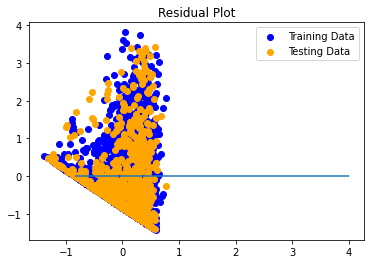

In [9]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [ ]:
## Linear Regression ##

In [10]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9986409810769963, R2: 0.15451439998848004


## LASSO model ##

In [11]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0011113833109455, R2: 0.15242286804194627


## Ridge model ##

In [12]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9986410689495203, R2: 0.15451432559242073


## ElasticNet model ##

In [13]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9999144536432462, R2: 0.15343623202103618
